In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)
x_train=x_train/255.0
x_test=x_test/255.0
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy is", test_acc)
predictions = model.predict(x_test[:10])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.2634 - loss: 1.9870 - val_accuracy: 0.3781 - val_loss: 1.7161
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3853 - loss: 1.7165 - val_accuracy: 0.3968 - val_loss: 1.6798
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3991 - loss: 1.6589 - val_accuracy: 0.4243 - val_loss: 1.5973
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4230 - loss: 1.5965 - val_accuracy: 0.4371 - val_loss: 1.5549
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4362 - loss: 1.5596 - val_accuracy: 0.4475 - val_loss: 1.5454
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4459 - loss: 1.5323 - val_accuracy: 0.4516 - val_loss: 1.5233
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4641 - loss: 1.4891 - val_accuracy: 0.4470 - val_loss: 1.5482
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4710 -

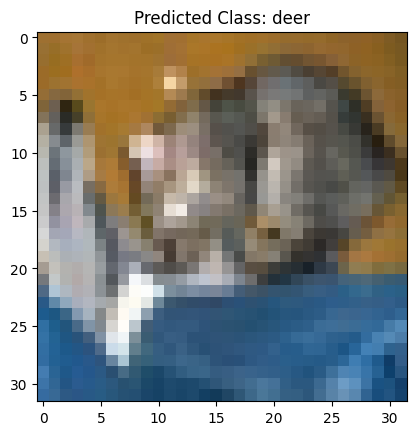

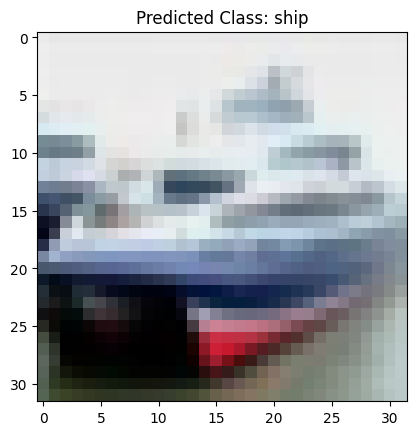

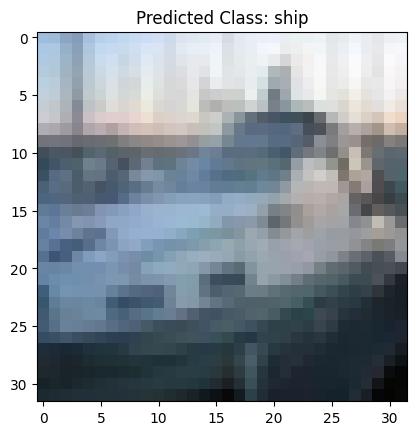

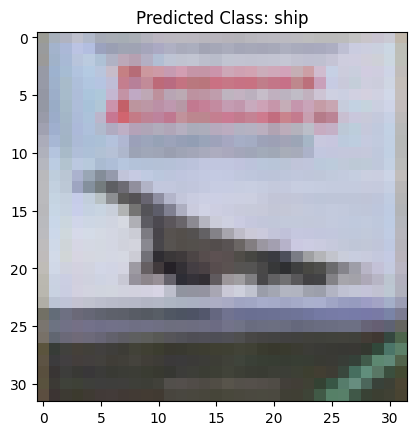

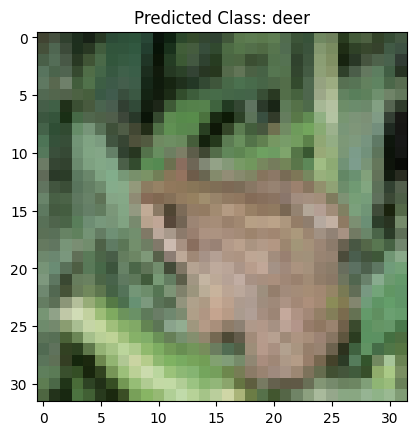

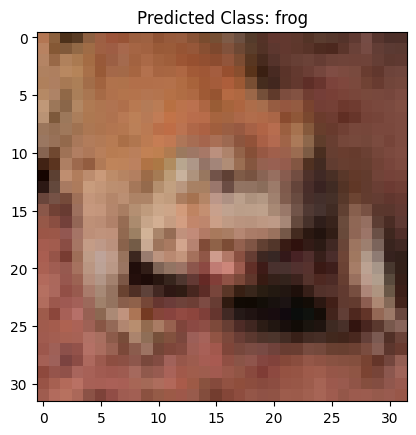

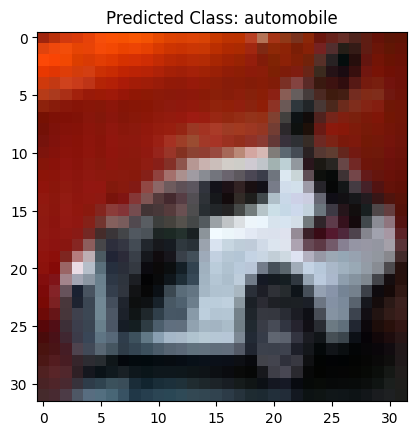

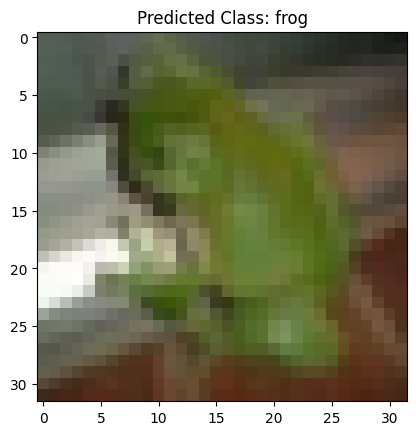

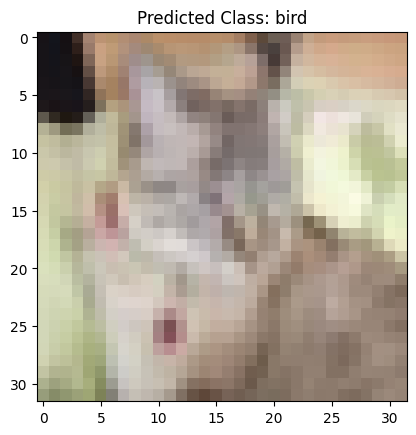

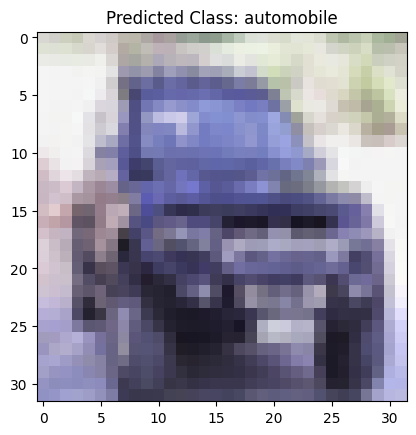

In [4]:
for i in range(10):
  plt.imshow(x_test[i])
  predicted_label=np.argmax(predictions[i])
  class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  plt.title("Predicted Class: "+class_names[predicted_label])
  plt.show()